
# **Sentiment Analysis of Real-time Flipkart Product Reviews**
Objective

    The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.
    Dataset

    A team of Data Engineers have already scraped real-time data from Flipkart website. They followed the instructions given in this documentation for extracting user reviews. Don’t scrape your own data. Use the dataset given below to solve the problem statement. Click Here to download the data.

    The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.
    Data Preprocessing

    Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.
    Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.
    Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.

Modeling Approach

    Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
    Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.

Model Deployment

    Flask or Streamlit App Development: Develop a Flask or Streamlit web application that takes user input in the form of a review and generates the sentiment (positive or negative) of the review.
    Model Integration: Integrate the trained sentiment classification model into the Flask or Streamlit app for real-time inference.
    Deployment: Deploy the Flask or Streamlit app on an AWS EC2 instance to make it accessible over the internet.

Workflow

    Data Loading and Analysis: Gain insights into product features that contribute to customer satisfaction or dissatisfaction.
    Data Cleaning: Preprocess the review text by removing noise and normalizing the text.
    Text Embedding: Experiment with different text embedding techniques to represent the review text as numerical vectors.
    Model Training: Train machine learning and deep learning models on the embedded text data to classify sentiment.
    Model Evaluation: Evaluate the performance of the trained models using the F1-Score metric.
    Flask or Streamlit App Development: Develop a Flask or Streamlit web application for sentiment analysis of user-provided reviews.
    Model Deployment: Deploy the trained sentiment classification model along with the Flask or Streamlit app on an AWS EC2 instance.
    Testing and Monitoring: Test the deployed application and monitor its performance for any issues or errors.

1.Data Loading and Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [4]:
filename='/content/drive/MyDrive/reviews_data_dump.zip'
with zipfile.ZipFile(filename,'r') as file:
  file.extractall()

In [5]:
df= pd.read_csv("/content/reviews_badminton/data.csv")

In [6]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [7]:
# rearranging the column names
df.columns=[col.lower().replace(" ","_") for col in df.columns]

In [8]:
df['ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: ratings, dtype: int64

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8508,8509,8510,8511,8512,8513,8514,8515,8516,8517
reviewer_name,Kamal Suresh,Flipkart Customer,A. S. Raja Srinivasan,Suresh Narayanasamy,ASHIK P A,Baji Sankar,Flipkart Customer,Flipkart Customer,Jafar Qureshi,Bheemesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_title,Nice product,Don't waste your money,Did not meet expectations,Fair,Over priced,Mind-blowing purchase,Must buy!,Classy product,Great product,Just wow!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_review,"Certified Buyer, Chirakkal","Certified Buyer, Hyderabad","Certified Buyer, Dharmapuri","Certified Buyer, Chennai",NaN,"Certified Buyer, Hyderabad","Certified Buyer, Doom Dooma","Certified Buyer, Panjim","Certified Buyer, Sheopur","Certified Buyer, Kurnool",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
up_votes,889.0,109.0,42.0,25.0,147.0,173.0,403.0,59.0,14.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
down_votes,64.0,6.0,3.0,1.0,24.0,45.0,121.0,13.0,1.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,Feb 2021,Feb 2021,Apr 2021,NaN,Apr 2016,Oct 2018,Jan 2020,Oct 2018,Aug 2018,May 2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_text,"Nice product, good quality, but price is now r...",They didn't supplied Yonex Mavis 350. Outside ...,Worst product. Damaged shuttlecocks packed in ...,"Quite O. K. , but nowadays the quality of the...",Over pricedJust â?¹620 ..from retailer.I didn'...,Good quality product. Delivered on time.READ MORE,BEST PURCHASE It is a good quality and is more...,Good quality original shuttles.READ MORE,AwesomeREAD MORE,nice original productsREAD MORE,...,No complaints about the item . Its the best on...,Not sure why we have charged for this product ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratings,4,1,1,3,1,5,5,5,5,5,...,5,1,1,1,2,5,2,4,1,4


In [10]:
df.isnull().sum()

reviewer_name       10
review_title        10
place_of_review     50
up_votes            10
down_votes          10
month              465
review_text          8
ratings              0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
df.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'month', 'review_text', 'ratings'],
      dtype='object')

In [13]:
imputer = SimpleImputer(strategy='mean')
df['down_votes'] = imputer.fit_transform(df[['down_votes']])
df['up_votes'] = imputer.fit_transform(df[['up_votes']])

imputer=SimpleImputer(strategy = 'most_frequent')
df['place_of_review'] = imputer.fit_transform(df[['place_of_review']]).flatten()
df['review_text'].fillna('', inplace=True)
df['review_title'].fillna('', inplace=True)
df['reviewer_name'].fillna('', inplace=True)
df['month'].fillna('Unknown', inplace=True)


## infer sentiment based on rating


In [14]:
positive_threshold = 3.5
# negative_threshold = 3.5
#infer sentiment based on rating
def infer_sentiment(rating):
  if rating >= positive_threshold:
    return 1  #positive Sentiment
  else:
    return 0 # Neural Rating or other

df['sentiment'] = df['ratings'].apply(infer_sentiment)

In [15]:
df['ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: ratings, dtype: int64

In [16]:
df['sentiment'].value_counts()

1    6826
0    1692
Name: sentiment, dtype: int64

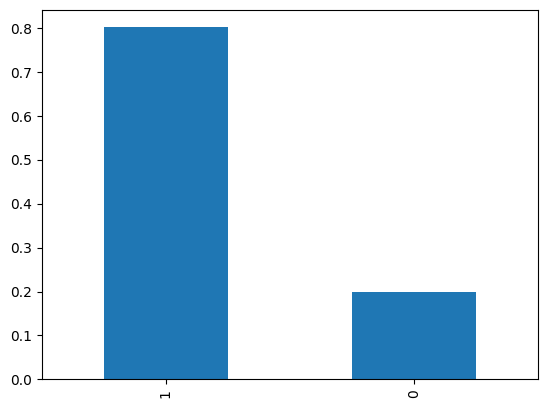

In [17]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [18]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,month,review_text,ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Unknown,"Quite O. K. , but nowadays the quality of the...",3,0
4,ASHIK P A,Over priced,"Certified Buyer, Bengaluru",147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0


In [19]:
df.loc[0,'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

# step 1 - Identify input and output

In [20]:
# Step 1: Identify Input and Output

X=df.review_text
y=df.sentiment

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6388,) (6388,)
(2130,) (2130,)


In [22]:
from wordcloud import WordCloud

def display_wordcloud(data):
  wc = WordCloud(background_color='black',
                 width=1600,
                 height=800).generate(' '.join(data))
  plt.figure(1,figsize=(30,20))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

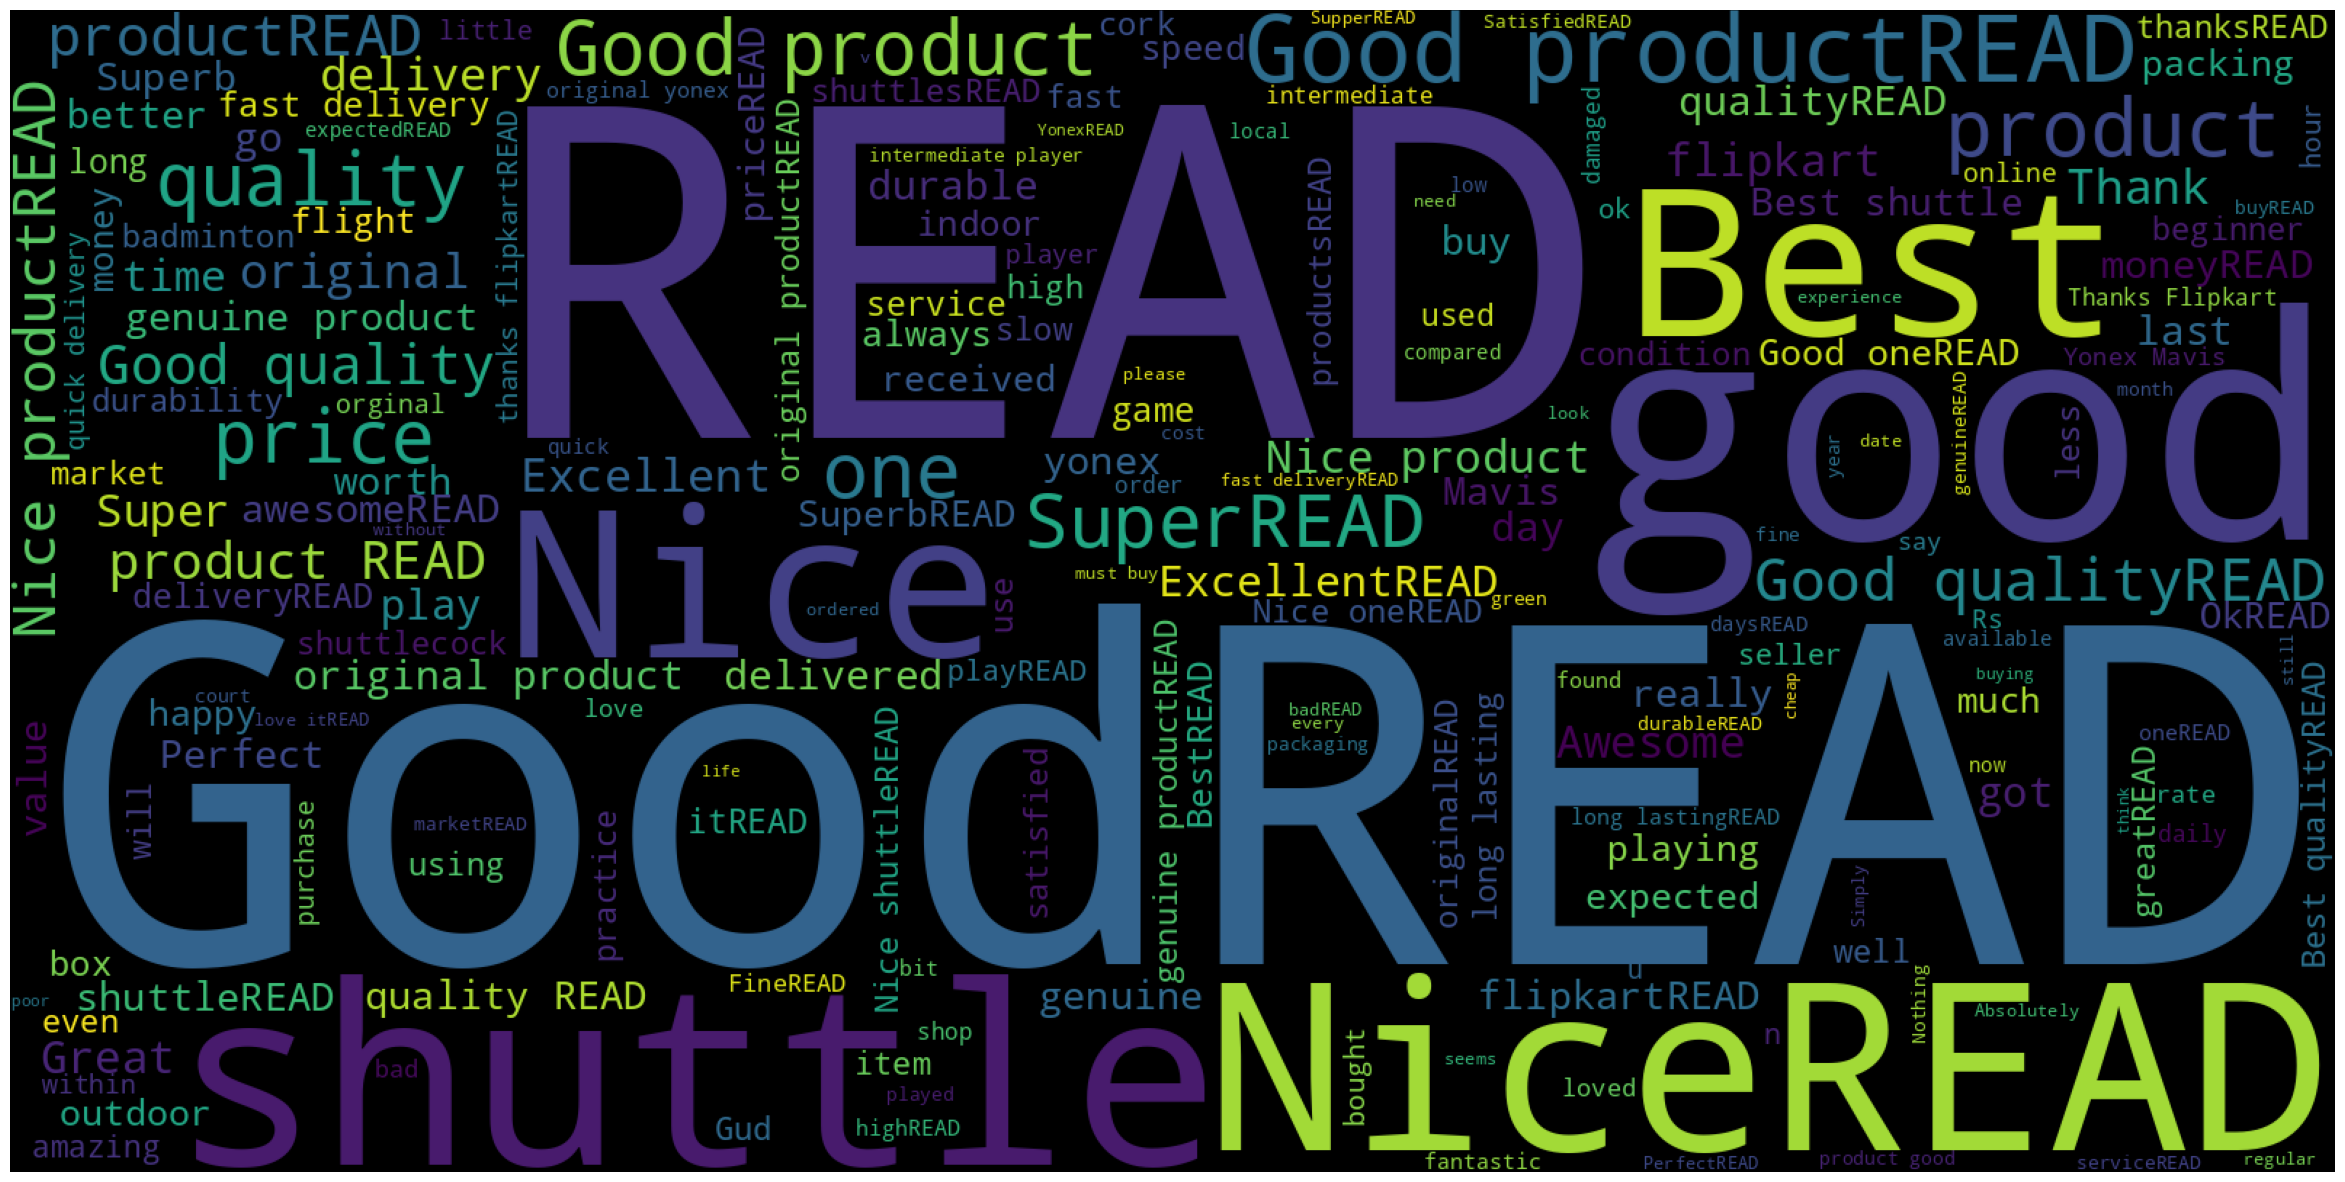

In [23]:
# Display the wordcloud for positive Sentiment
display_wordcloud(X_train[y_train==1])

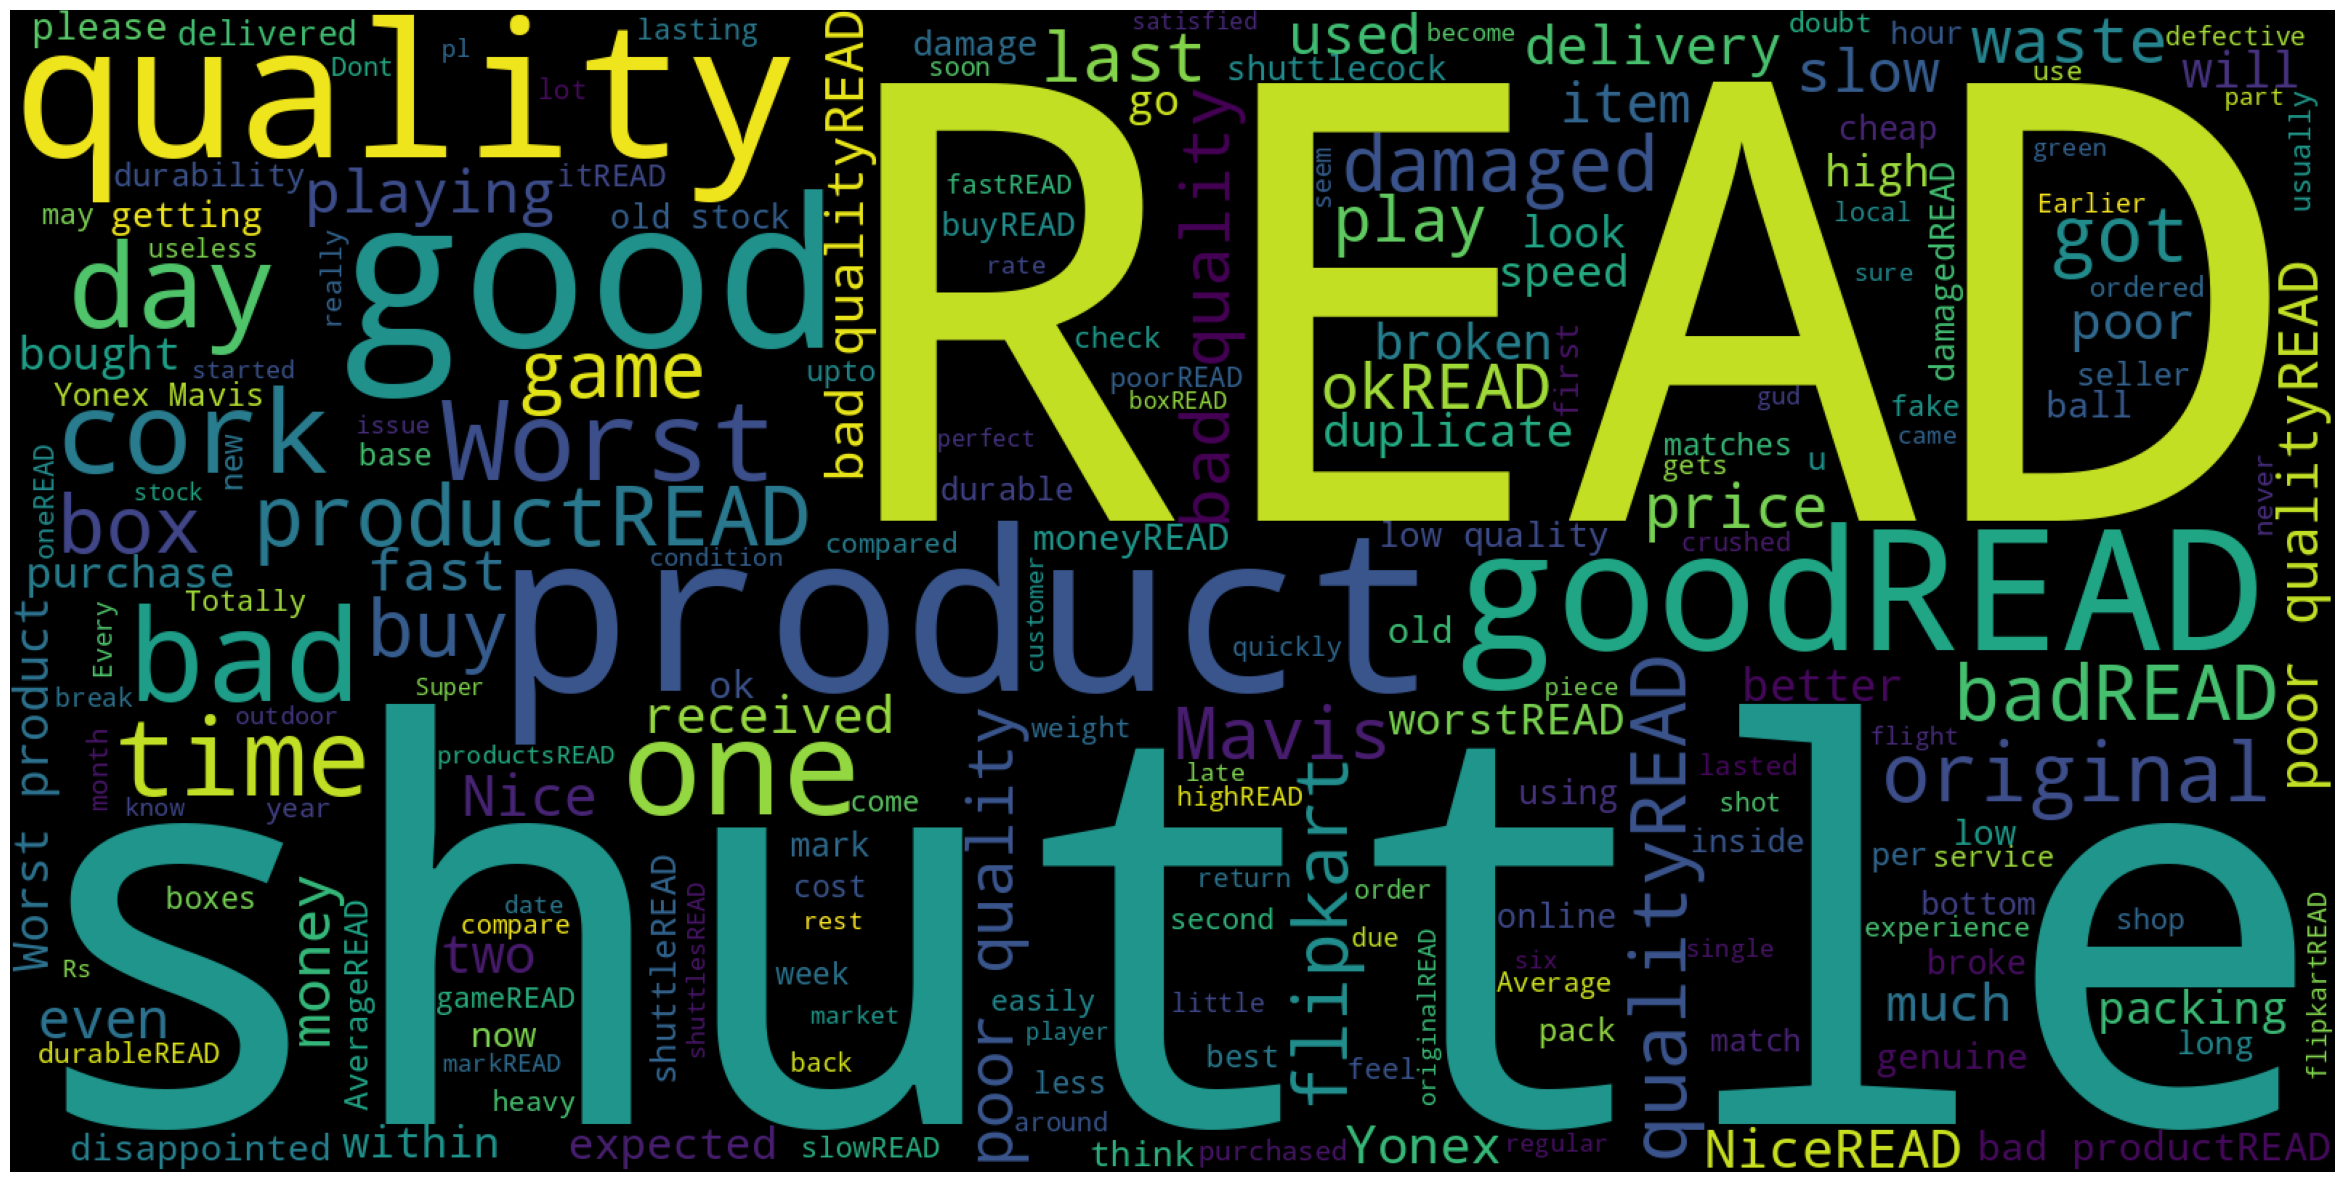

In [24]:
# Display the wordcloud for Negative Sentiment
display_wordcloud(X_train[y_train==0])

# step 3 : Data Preprocessing on train data


In [25]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
lemmatizer=WordNetLemmatizer()

In [26]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("READ", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [27]:
import nltk

# Download the punctuations
nltk.download('punkt')
# Download the stop words corpus
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
%time
X_train_clean = X_train.apply(lambda doc: clean(doc))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [32]:
%time
X_test_clean = X_test.apply(lambda doc: clean(doc))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [33]:
X_test_clean

526                                                  good
1315                                          wa original
5743                                         nice product
1526    using mavis since year would given star star c...
7037                                         best product
                              ...                        
1520                              bad goodaverage product
6220                                         nice product
5489                                         good quality
4123                                                 nice
7961                        please rate mach product good
Name: review_text, Length: 2130, dtype: object

In [34]:
# optimal Workflow

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import joblib
from joblib import Memory
import os
from sklearn.decomposition import TruncatedSVD
import time


from imblearn.over_sampling import SMOTE

In [36]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = joblib.Memory(location=cachedir, verbose=0)  # Change Memory to joblib.Memory

# Define pipelines for each algorithm
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [10,20,50],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}



# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)

    # smote = SMOTE(random_state=42)
    # X_resampled, y_resampled = smote.fit_resample(X_train_clean, y_train)

    start_time = time.time()
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    grid_search.fit(X_train_clean, y_train)

    best_model = grid_search.best_estimator_
    best_models[algo] = best_model

    train_time = time.time() - start_time

    y_pred = best_model.predict(X_test_clean)
    test_f1_score = f1_score(y_test, y_pred)


    print("Best parameters found:", grid_search.best_params_)
    print("Training time: {:.2f} seconds".format(train_time))
    print("F1 Score on Test Data:", test_f1_score)


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'classifier__alpha': 1, 'vectorization': CountVectorizer(max_features=5000), 'vectorization__max_features': 5000}
Training time: 3.53 seconds
F1 Score on Test Data: 0.932352108689499
********** decision_tree **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'classifier__max_depth': 10, 'vectorization': TfidfVectorizer(max_features=2000), 'vectorization__max_features': 2000}
Training time: 16.60 seconds
F1 Score on Test Data: 0.9183786785119379
********** logistic_regression **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.4, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'vectorization': CountVectorizer(max_features=50), 'vectorization__max_features': 50}
Training time: 33.48 seconds
F1 Score on Test Data: 0.8619167717528373


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn import metrics


naive_bayes


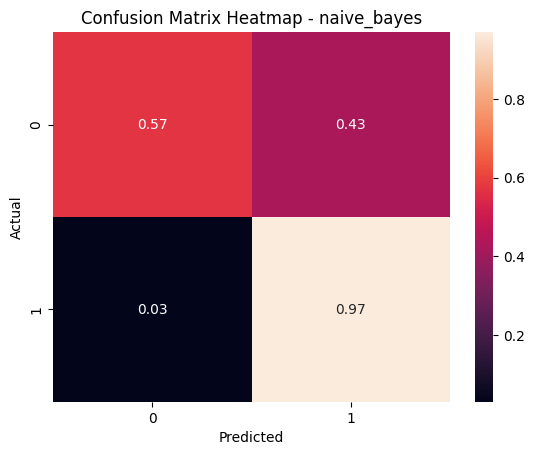


decision_tree


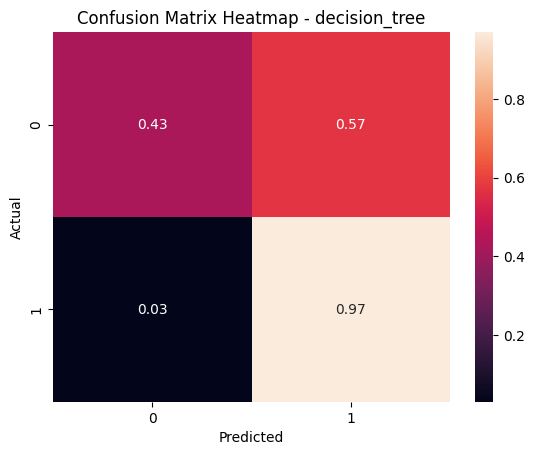


logistic_regression


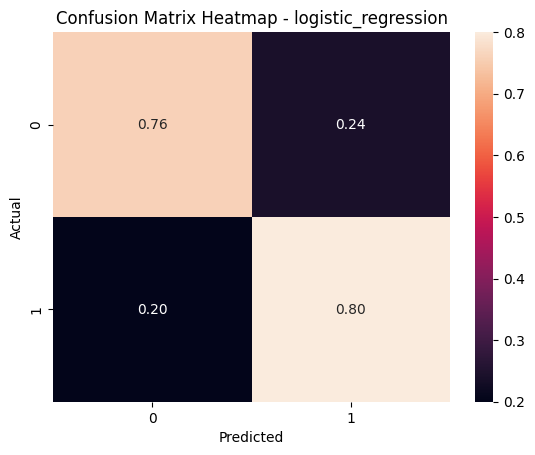

In [39]:
import numpy as np
import seaborn as sns

for name, model in best_models.items():
    print()
    print(name)

    # Predictions on test data
    y_test_pred = model.predict(X_test_clean)

    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    actual = np.sum(cm, axis=1).reshape(-1, 1)
    cmn = np.round(cm / actual, 2)

    # Plot heatmap
    sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix Heatmap - {name}')

    plt.show()


In [40]:
import matplotlib.pyplot as plt

train_f1_scores = []
test_f1_scores = []

for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    # Save the model
    joblib.dump(model, f'{name}.pkl')

    # Load the model
    model = joblib.load(f'{name}.pkl')

    # Predictions on test data
    y_test_pred = model.predict(X_test_clean)
    test_f1 = metrics.f1_score(y_test, y_test_pred)
    test_f1_scores.append(test_f1)

    # Predictions on train data (assuming X_train is available)
    y_train_pred = model.predict(X_train_clean)
    train_f1 = metrics.f1_score(y_train, y_train_pred)
    train_f1_scores.append(train_f1)

    print("F1 Score on Test Data:", test_f1)
    print("F1 Score on Train Data:", train_f1)
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")



********** naive_bayes **********
F1 Score on Test Data: 0.932352108689499
F1 Score on Train Data: 0.9414858645627877
Model Size: 154167 Bytes
********** decision_tree **********
F1 Score on Test Data: 0.9183786785119379
F1 Score on Train Data: 0.9277915405083035
Model Size: 117677 Bytes
********** logistic_regression **********
F1 Score on Test Data: 0.8619167717528373
F1 Score on Train Data: 0.866390041493776
Model Size: 28458 Bytes


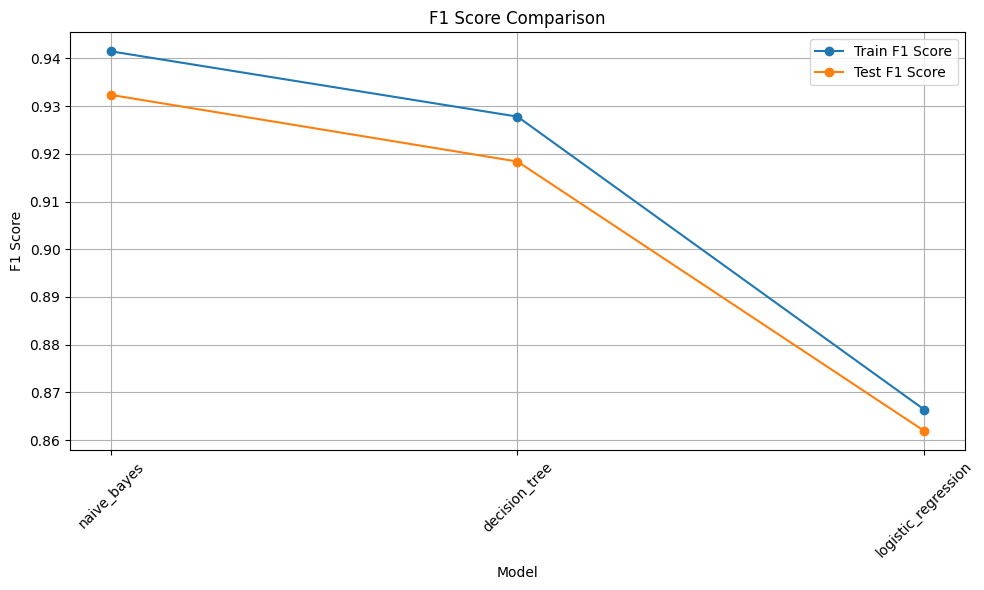

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(best_models.keys()), train_f1_scores, marker='o', label='Train F1 Score')
plt.plot(list(best_models.keys()), test_f1_scores, marker='o', label='Test F1 Score')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
model = joblib.load('/content/naive_bayes.pkl')

new_data = [
    """Inflation in the 20-nation euro zone eased to 2.6% in February,
    flash figures showed on Friday, but both the headline and core
    figures were higher than expected.
    Economists polled by Reuters had forecast a headline reading of 2.5%.
    Core inflation, stripping out volatile components of energy, food,
    alcohol and tobacco, was 3.1% — above the 2.9% expected.
    The European Union statistics agency said food, alcohol and tobacco
    had the highest inflation rate in February at 4%, followed by services
    at 3.9%.
    Energy prices, which had swollen last year as a result of Russia’s
    invasion of Ukraine, continued to reduce, with the rate of deflation
    moving from -6.1% to -3.7%.
    The headline print previously came in at 2.8% in January, with further
    easing expected after price rises cooled in Germany, France and Spain.
    Investors are hunting for clues on when the European Central Bank will
    start to bring down interest rates, with market pricing pointing to a
    June cut. Yet many ECB officials still stress that they need spring wage
    negotiations to conclude before they have a clearer picture of domestic
    inflationary pressures.
    The February figures will be a mixed bag for policymakers, as core
    inflation is holding above 3% even as the headline rate moves toward
    the ECB’s 2% target. Price rises have nonethless cooled significantly
    from their peak of 10.6% in October 2022."""]

new_data_clean = [clean(doc) for doc in new_data]

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0]


In [43]:
for doc in new_data:
  print(doc)

Inflation in the 20-nation euro zone eased to 2.6% in February,
    flash figures showed on Friday, but both the headline and core
    figures were higher than expected.
    Economists polled by Reuters had forecast a headline reading of 2.5%.
    Core inflation, stripping out volatile components of energy, food,
    alcohol and tobacco, was 3.1% — above the 2.9% expected.
    The European Union statistics agency said food, alcohol and tobacco
    had the highest inflation rate in February at 4%, followed by services
    at 3.9%.
    Energy prices, which had swollen last year as a result of Russia’s
    invasion of Ukraine, continued to reduce, with the rate of deflation
    moving from -6.1% to -3.7%.
    The headline print previously came in at 2.8% in January, with further
    easing expected after price rises cooled in Germany, France and Spain.
    Investors are hunting for clues on when the European Central Bank will
    start to bring down interest rates, with market pricing poi